Telco-Churn EDA

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

telco_data_base = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

In [71]:
telco_data_base.shape

(7043, 21)

In [72]:
telco_data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
telco_data_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical column.**

In [74]:
telco_data_base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Analyzing the target.

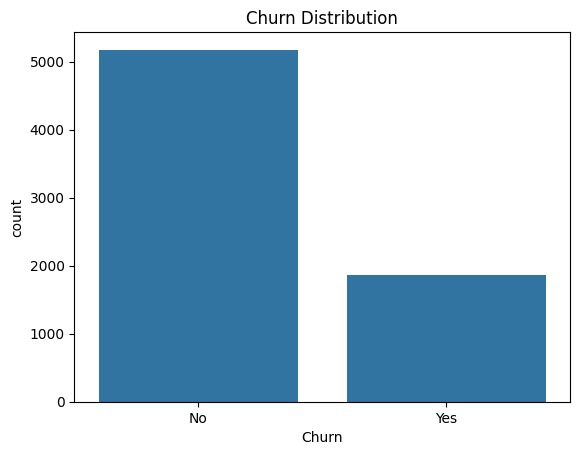

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [75]:
sns.countplot(x="Churn", data=telco_data_base)
plt.title("Churn Distribution")
plt.show()

print(telco_data_base["Churn"].value_counts(normalize=True))

In [76]:
telco_data_base["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data is imbalanced(73 - 27 ratio). We need to analyse other features.

In [77]:
telco_data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


CLEANING AND CONVERTING SECTION

In [78]:
telco_data = telco_data_base.copy()

TotalCharges must be int. We will convert it to integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TotalCharges    7043 non-null   float64
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


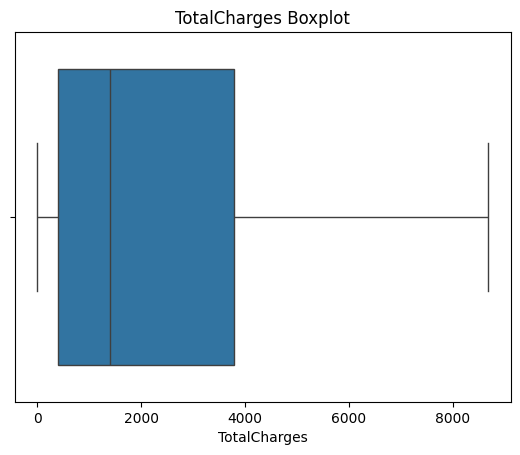

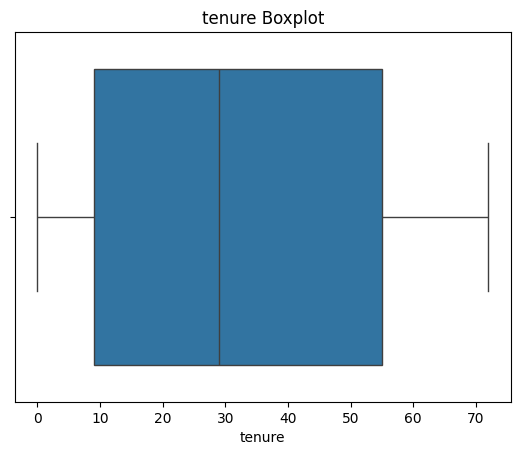

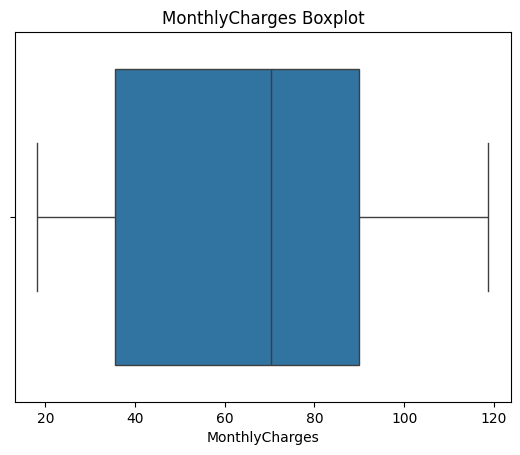

In [79]:
# Numerical columns.
telco_data["TotalCharges"] = pd.to_numeric(telco_data["TotalCharges"],errors="coerce")
# We fill those null values of TotalCharges with 0.
telco_data.loc[telco_data["tenure"] == 0, "TotalCharges"] = 0
telco_data["TotalCharges"] = telco_data["TotalCharges"].fillna(telco_data["TotalCharges"].median())


numerical_columns = ["TotalCharges","tenure","MonthlyCharges"]

telco_data[numerical_columns].info()

for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=telco_data[col])
    plt.title(f"{col} Boxplot")
    plt.show()



There is no outliners.


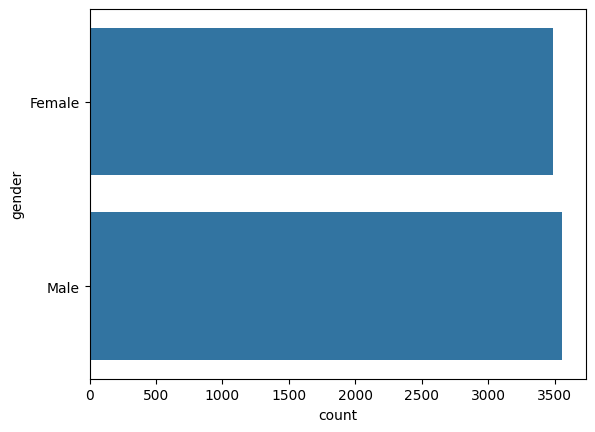

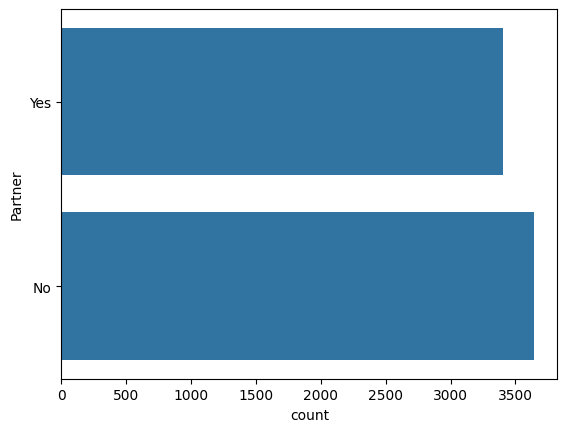

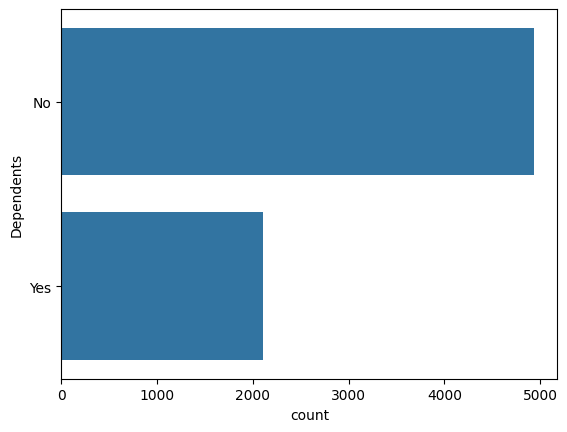

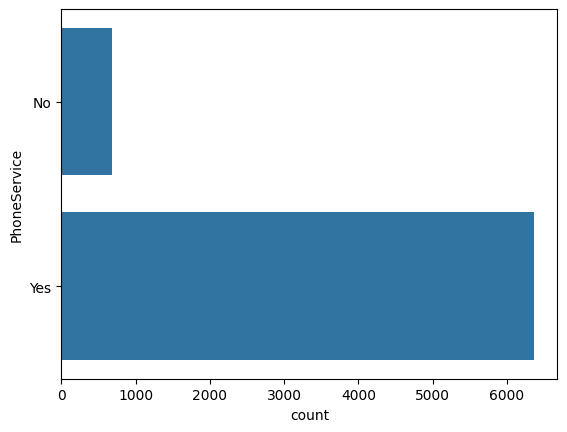

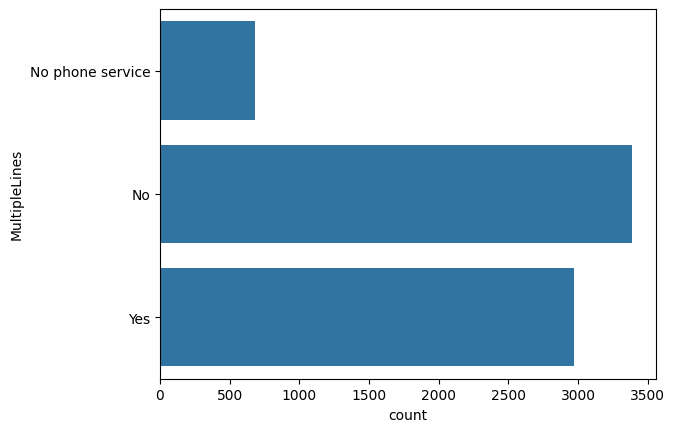

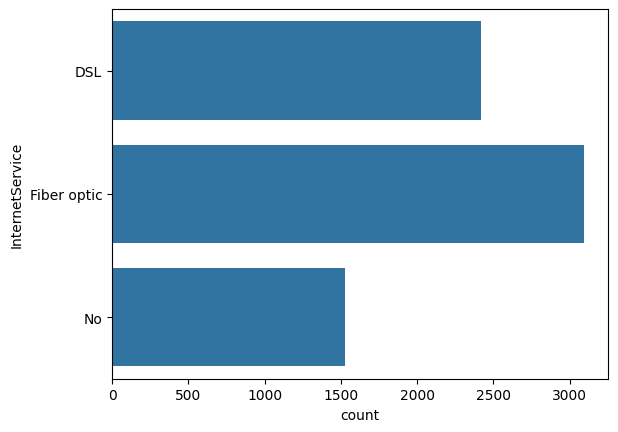

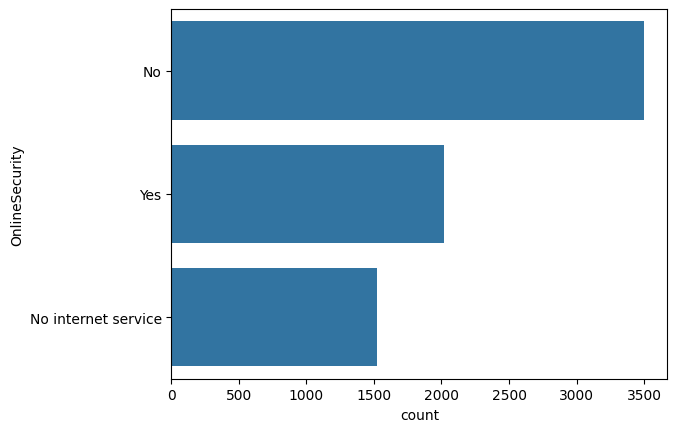

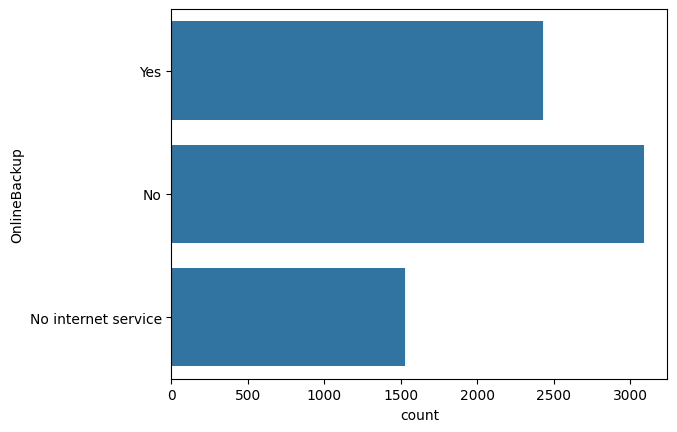

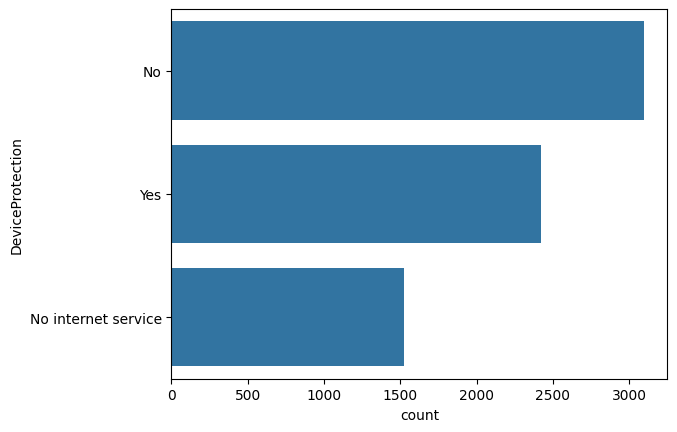

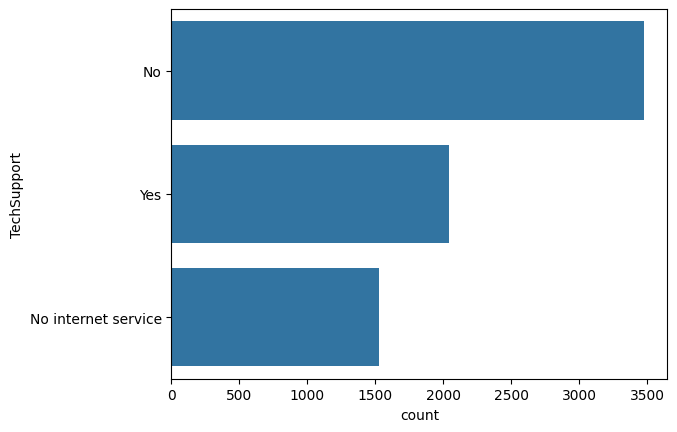

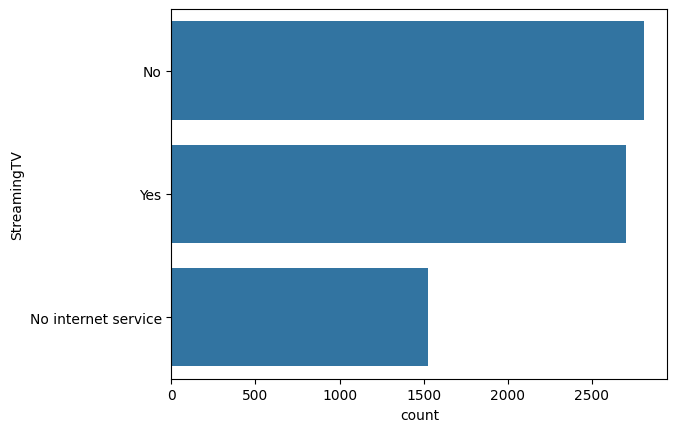

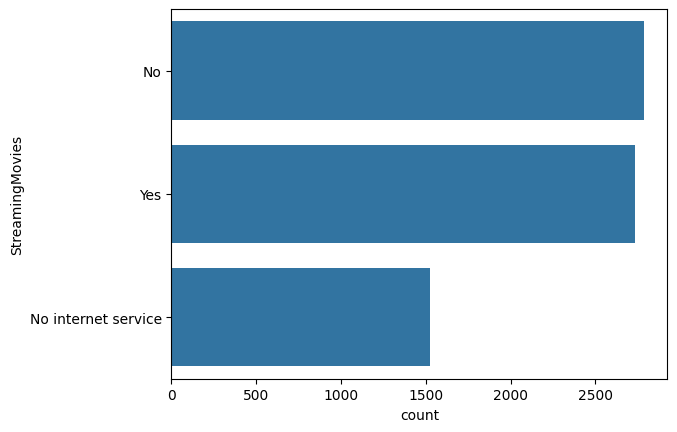

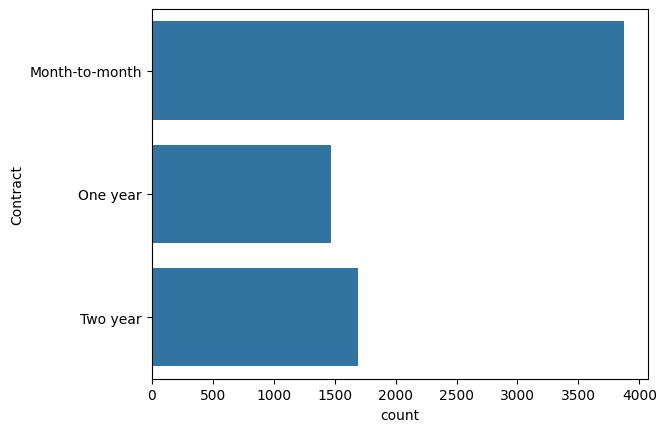

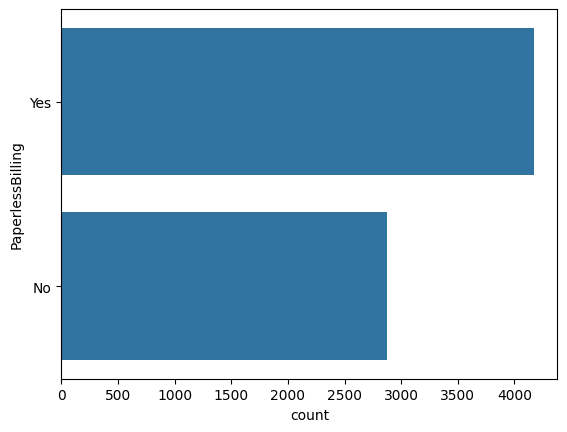

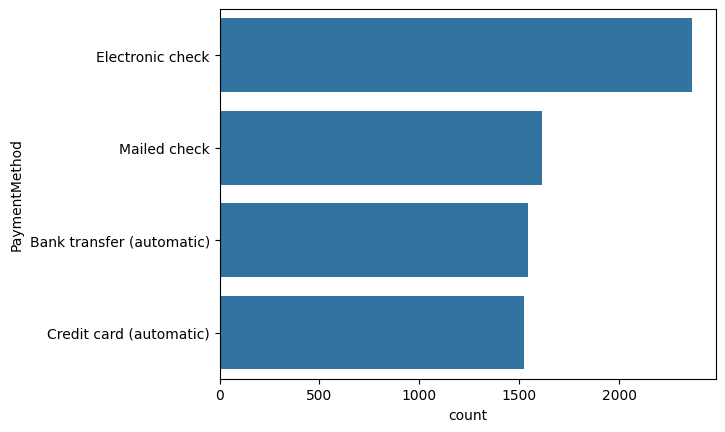

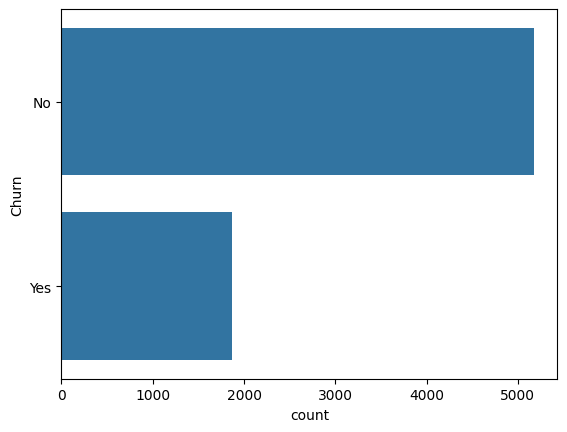

In [80]:
# Categorical columns.

# Drop unique columns

telco_data = telco_data.drop("customerID",axis = 1)

categorical_columns = telco_data.select_dtypes(include=["object"]).columns.to_list()

for col in categorical_columns:

    sns.countplot(y=col,data=telco_data)
    plt.show()





We see some categorical columns where we have Yes and No. These are binary cat. columns. We will convert them to 0 and 1. Then we'll convert rest into dummies. 

In [81]:
telco_data["gender"] = telco_data["gender"].map({"Male" : 1,"Female":0})


ord_cat_columns = ["Churn","Partner","Dependents","PhoneService","PaperlessBilling"]

for col in ord_cat_columns:

    telco_data[col] = telco_data[col].map({"Yes":1,"No":0})



telco_data_final = pd.get_dummies(telco_data,drop_first=True,dtype = int)
telco_data_final.head()






,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


EXPLORING RELATIONSHIPS

Numerical Columns and Churn.

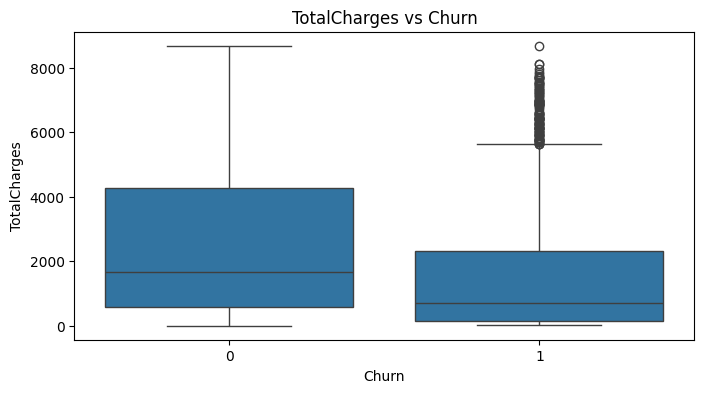

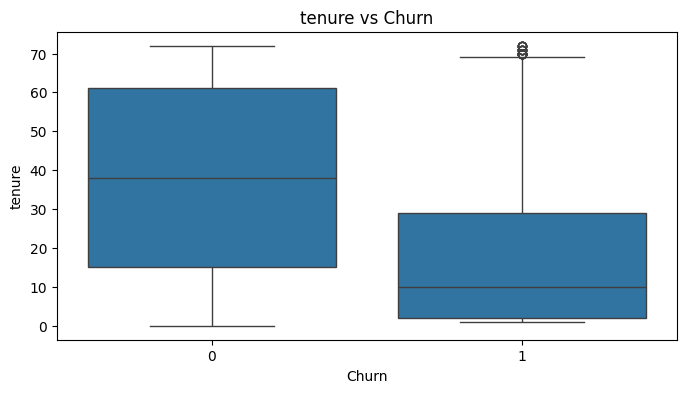

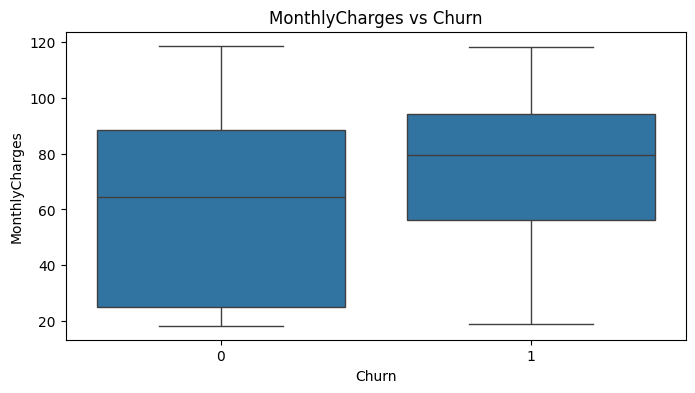

In [82]:
for col in numerical_columns:

    plt.figure(figsize=(8,4))
    sns.boxplot(x="Churn",y=col,data = telco_data_final)
    plt.title(f"{col} vs Churn")
    plt.show()



P1 = On the right side (1) we have people that churned after 6000 of TotalCharge.

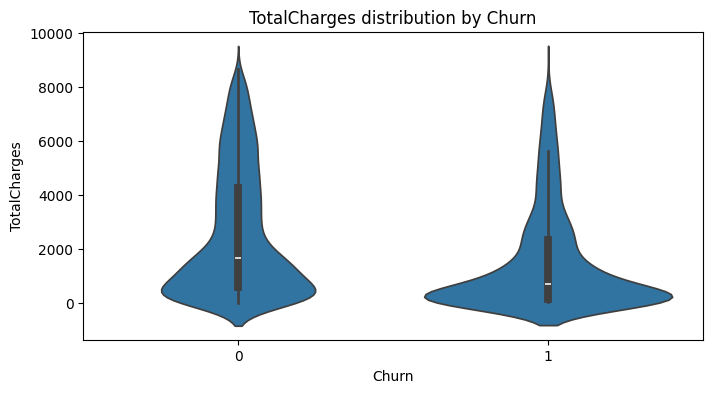

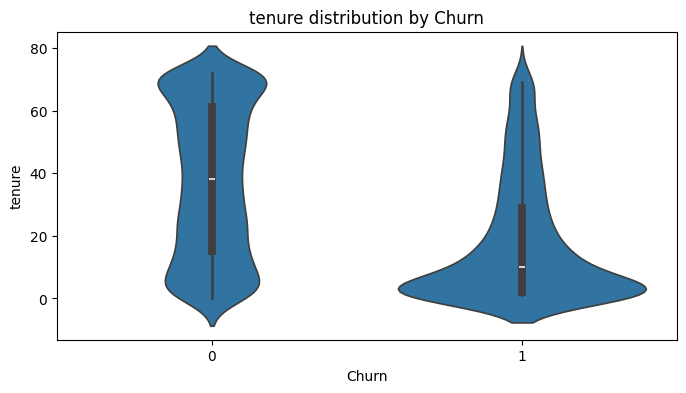

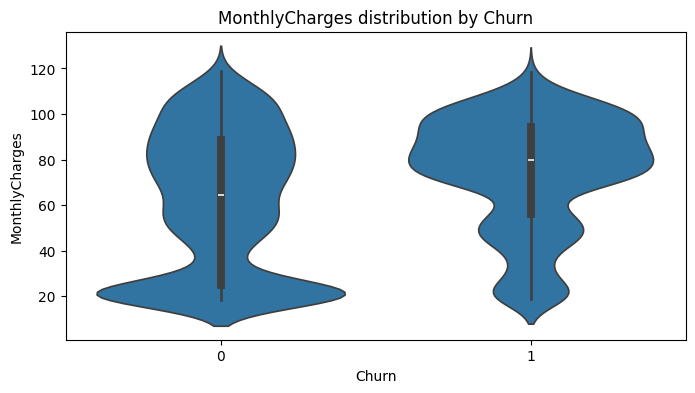

In [83]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.violinplot(x="Churn", y=col, data=telco_data)
    plt.title(f"{col} distribution by Churn")
    plt.show()

P1 = If they survive the first few months and move higher up the violin, they become much less likely to churn.

P2 = We have a group of new loyalists at the bottom and a very large, stable group of long-term veterans at the top.
P2 = New customers are more likely to churn. If they survive, they become more loyal.
That means we ahve onboarding problem, people who survives first year become more likely to stay.

P3 = Massive group of loyal customers who are likely to have basic, low-cost plans.
P3 = Customers with higher monthly bills are significantly more likely to leave.

We are losing high-paying customers almost immediately after they join. Our long-term customers are stable and generally pay less per month.

CATEGORICAL RELATIONSHIPS

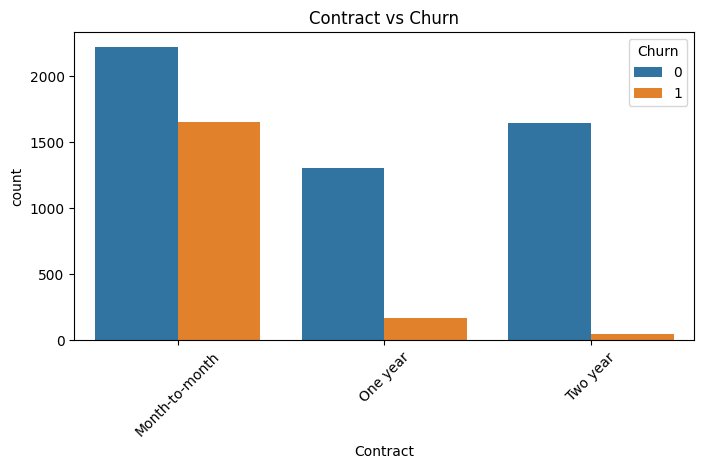

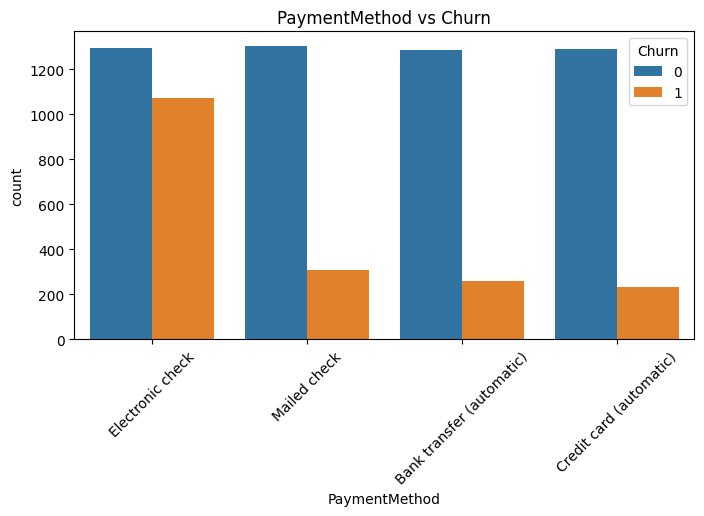

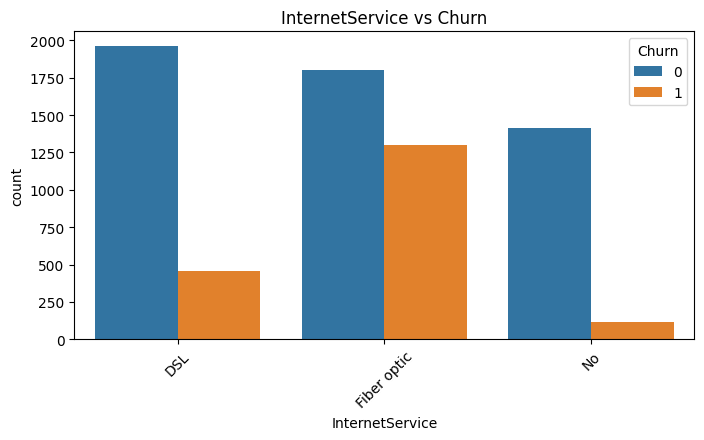

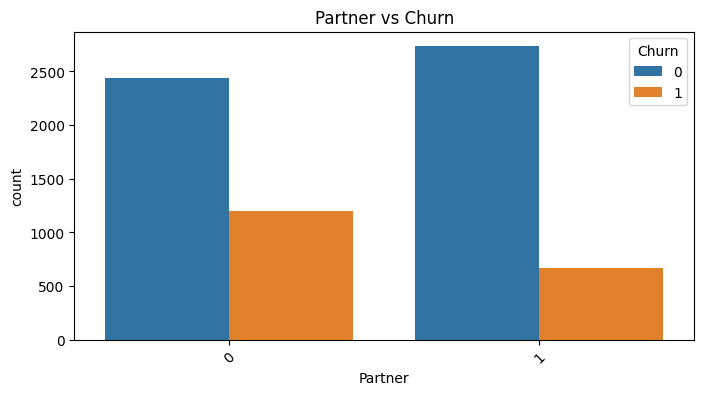

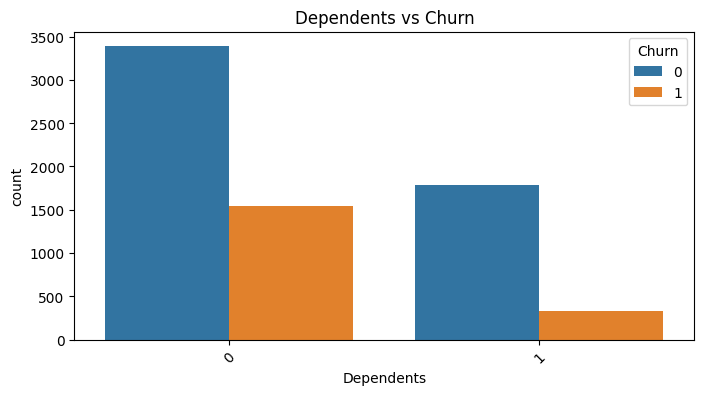

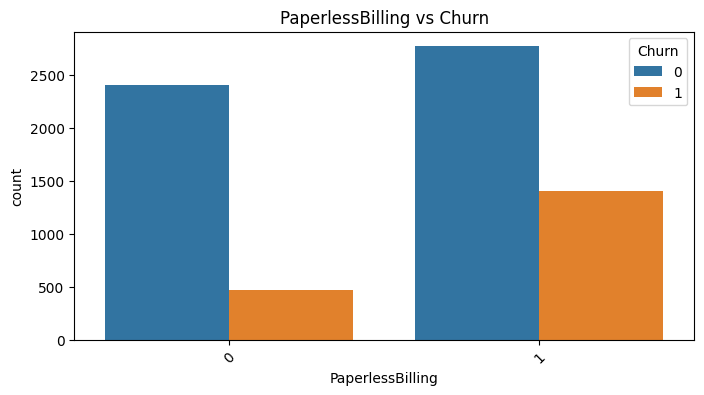

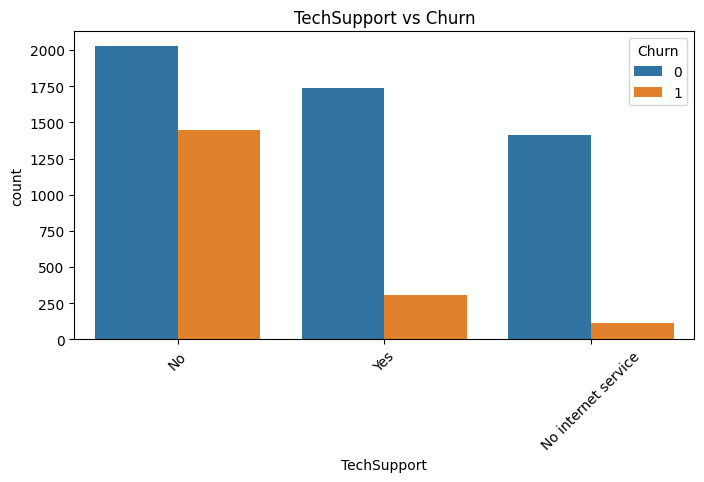

In [89]:
cat_rel_cols = ["Contract","PaymentMethod","InternetService","Partner","Dependents",
            "PaperlessBilling","TechSupport"]

for col in cat_rel_cols:

    plt.figure(figsize=(8,4))
    sns.countplot(x=col,hue="Churn",data = telco_data)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()



P1 = People who have month-to-month contract more likely to churn.
P2 = People who pay by electronic check more likely to churn.
P3 = Customers with Fiber optic internet tend to churn more, likely because they have higher monthly bills. (PRICE RELATED)
P4 = People who have partner more liklely to stay
P5 = People who have dependencies more likely to stay.
P6 = People who do not get TechSupport more likely to churn.